In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import html.parser
h = html.parser.HTMLParser()

In [2]:
for k in range(1,11):
    df = pd.read_csv('target_conversations/output/cmv1_chain{}.tsv'.format(k))
    break

In [43]:
from keras.preprocessing import sequence
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Embedding, LSTM,GRU, Bidirectional,CuDNNLSTM

model = load_model('data_files/abortion/bilstm.h5')
import pickle
# loading
with open('data_files/abortion/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
maxlen = 100

/Users/yuki/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
in_sentences

["Firstly, your position is a pro-choice position, it's just a radicalized sort of pro-choice position",
 ' For example, atheists who happen to be extreme (e',
 'g',
 " anti-theists) don't stop being atheists",
 "But I don't consider that to be very important",
 ' More important is this: the views that you have given thus far could all be given in support of letting unwanted babies die',
 ' Do you also hold this view',
 '; Abortions help society',
 '',
 '',
 '',
 'There are many reasons that we should try to minimize the number of unwanted babies',
 'Everything here also applies to unwanted babies who are already born',
 '; View: A fetus is essentially a form of parasite, and women deserve the ability to remove such a parasite from their bodies',
 'I assume this is a sort of a bodily autonomy argument',
 " It seems like you're saying something like: women have a right to do what they want with their own bodies",
 ' This gives them the right to remove parasites that are attached to thei

In [71]:
medians = []
for g in  df['body']:
    if str(g)!='nan':
        in_body = h.unescape(str(g))
        in_sentences = in_body.replace("e.g.","eg").replace("?",".").split('.')
        # clean short things ("..." etc.)
        in_sentences = np.array([ins for ins in in_sentences if len(ins)>20])
        in_sentences = np.array([ins for ins in in_sentences if ins[0]!=">"])
        scores = []
        in_sentences = [str(in_sentences[k:k+1][0])+str(in_sentences[k+1:k+2])
                        for k in range(len(in_sentences))]

        for ins_words in in_sentences:
            ins = tokenizer.texts_to_sequences([ins_words])
            ins = np.array(sequence.pad_sequences(ins, maxlen=maxlen))
            y = model.predict(ins)[0][0]
#             if y<0.3:
#                 print(y,ins_words)
            scores.append(y)
    medians.append(np.median(scores))

/Users/yuki/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.
/Users/yuki/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yuki/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [73]:
df['median_scores'] = medians

0.7197044


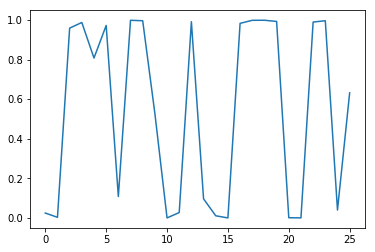

In [70]:
plt.plot(scores)
print(np.median(scores))

In [42]:
h.unescape(str(df['body'][2]))

/Users/yuki/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  """Entry point for launching an IPython kernel.


'> the views that you have given thus far could all be given in support of letting unwanted babies die. Do you also hold this view?I don\'t, and here is the key difference. A baby that has been born is no longer directly dependent on its mothers nutrients for survival. They could get their nutrients from anywhere. Once the baby is born, giving it up for adoption is a valid option. To tie this in with my views specifically, imagine that tomorrow some technology was invented that allowed people to get fetuses out of themselves, put them in some sort of artificial womb, and let them continue their development there free from the mother. If/when this technology becomes available it will have a drastic effect on my views, but since it is not yet available I see abortion as the best option when you\'ve got a fetus in you that you don\'t want.; You could say something like: all people have a right to do what they want with their own bodies. This gives them the right to refuse to care for othe